PROJEKT MACHINE LEARNING - ANIMALS10 DATASET

Wczytywanie obrazów

In [6]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Ścieżki do folderów zawierających obrazy dla poszczególnych klas
sciezki = ['raw-img/cane', 'raw-img/cavallo', 'raw-img/elefante', 'raw-img/farfalla', 'raw-img/gallina', 'raw-img/gatto', 'raw-img/mucca', 'raw-img/pecora', 'raw-img/ragno', 'raw-img/scoiattolo']

# Mapowanie nazw klas na bardziej zrozumiałe etykiety
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

# Nazwy klas
nazwy_klas = ['dog', 'horse', 'elephant', 'butterfly', 'chicken', 'cat', 'cow', 'sheep', 'ragno', 'squirrel']

# Listy przechowujące dane
train_photos = []
train_labels = []
desired_shape = (32, 32)

# Funkcja do wczytywania obrazów do listy
def fillArr(sciezka_idx):
    biblioteka = sciezki[sciezka_idx]
    files = os.listdir(biblioteka)
    for filename in tqdm(files, desc=f'Loading images from class {sciezka_idx}'):
        f = os.path.join(biblioteka, filename)
        if os.path.isfile(f):
            try:
                image = Image.open(f)
                image = image.resize(desired_shape)
                photo_array = np.array(image)
                if photo_array.shape == (32, 32, 3):
                    train_photos.append(photo_array.flatten())
                    train_labels.append(sciezka_idx)
                else:
                    print(f'inny{sciezka_idx}: {photo_array.shape}')
            except Exception as e:
                print(f'Błąd podczas wczytywania obrazu {f}: {e}')

# Wczytanie obrazów dla każdej klasy
for i in range(0, len(sciezki)):
    fillArr(i)

# Przygotowanie danych
train_photos = np.array(train_photos)
train_photos = train_photos / 255
train_labels = np.array(train_labels)
print("Zakonczono ladowanie obrazow...")

Loading images from class 0:   0%|          | 0/4863 [00:00<?, ?it/s]

Loading images from class 2:   6%|▌         | 90/1446 [00:00<00:05, 266.12it/s]

inny2: (32, 32, 4)
inny2: (32, 32, 4)
inny2: (32, 32, 4)
inny2: (32, 32, 4)
inny2: (32, 32)
inny2: (32, 32, 4)


Loading images from class 2:  10%|█         | 148/1446 [00:00<00:04, 263.72it/s]

inny2: (32, 32, 4)
inny2: (32, 32, 4)
inny2: (32, 32, 4)


Loading images from class 2:  22%|██▏       | 318/1446 [00:01<00:04, 270.70it/s]

inny2: (32, 32, 4)


Loading images from class 3:   3%|▎         | 57/2112 [00:00<00:07, 282.40it/s]

inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)


Loading images from class 3:   7%|▋         | 155/2112 [00:00<00:06, 310.87it/s]

inny3: (32, 32, 4)


Loading images from class 3:  12%|█▏        | 252/2112 [00:00<00:06, 303.65it/s]

inny3: (32, 32, 4)


Loading images from class 3:  17%|█▋        | 350/2112 [00:01<00:05, 309.13it/s]

inny3: (32, 32, 4)
inny3: (32, 32, 4)


Loading images from class 3:  18%|█▊        | 382/2112 [00:01<00:05, 302.48it/s]

inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)


Loading images from class 3:  23%|██▎       | 495/2112 [00:01<00:05, 317.36it/s]

inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)
inny3: (32, 32, 4)


Loading images from class 5:  78%|███████▊  | 1301/1668 [00:02<00:01, 242.37it/s]

inny5: (32, 32, 4)


Loading images from class 8:   7%|▋         | 346/4821 [00:01<00:13, 335.47it/s]

inny8: (32, 32, 4)


Loading images from class 9: 100%|██████████| 1862/1862 [00:02<00:00, 915.38it/s]


Zakonczono ladowanie obrazow...


Macierz korelacji między kanałami kolorów.

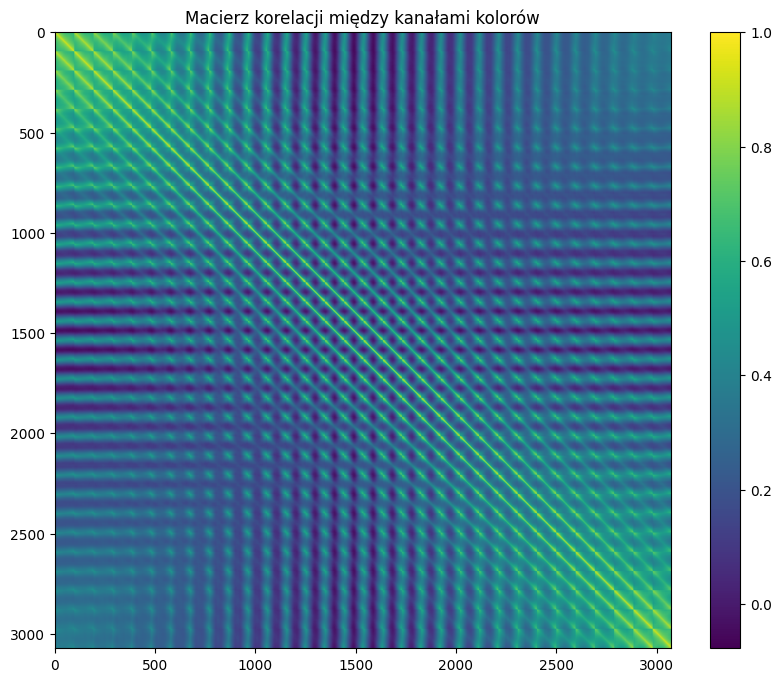

In [7]:
channel_correlation = np.corrcoef(train_photos.reshape(train_photos.shape[0], -1), rowvar=False)

plt.figure(figsize=(10, 8))
plt.imshow(channel_correlation, cmap='viridis')
plt.colorbar()
plt.title('Macierz korelacji między kanałami kolorów')
plt.show()

Funkcja do wyświetlania obrazów

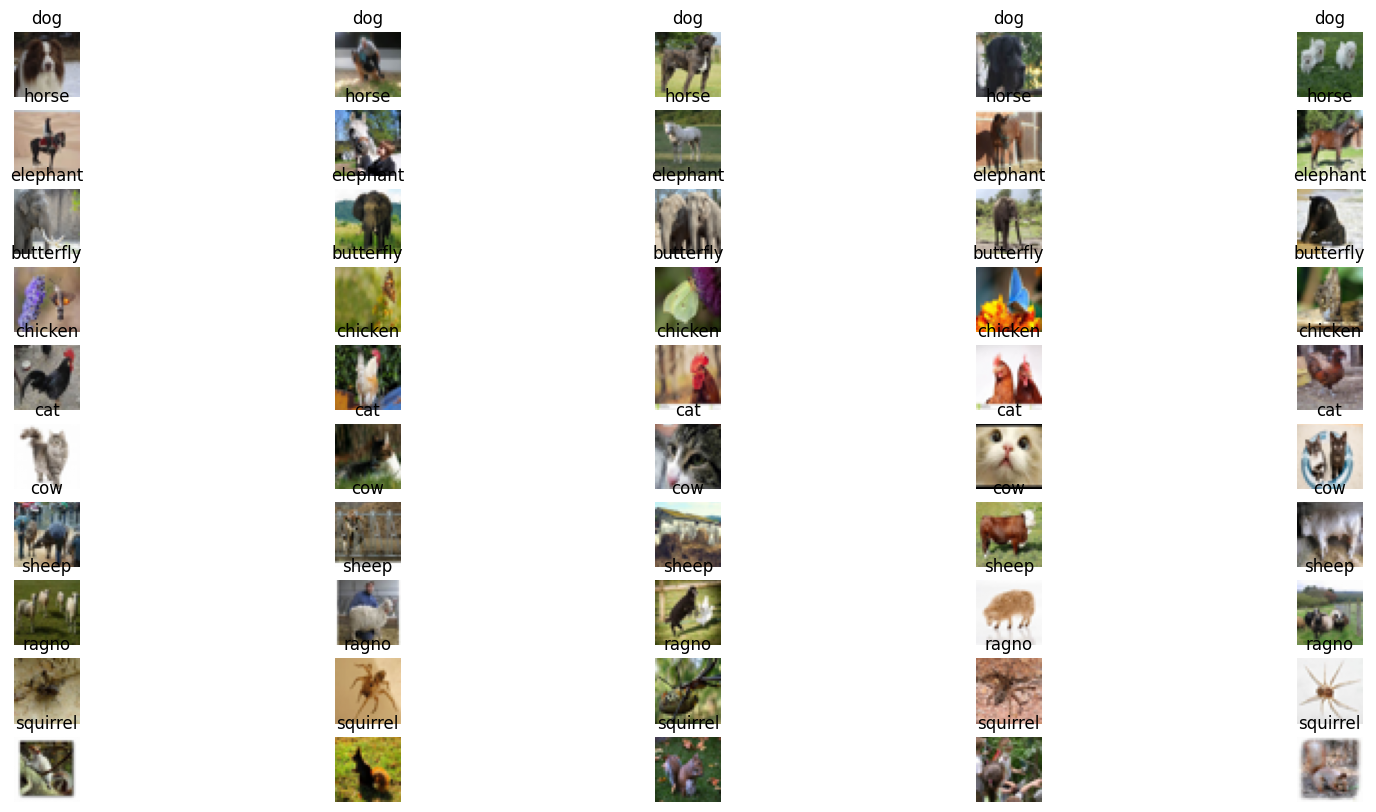

In [8]:
def display_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(20, 10))
    
    for i, class_name in enumerate(class_names):
        class_indices = np.where(labels == i)[0]
        selected_indices = np.random.choice(class_indices, num_images, replace=False)
        
        for j, idx in enumerate(selected_indices):
            plt.subplot(len(class_names), num_images, i * num_images + j + 1)
            
            original_shape = (32, 32, 3)
            reshaped_image = images[idx].reshape(original_shape)
            
            plt.imshow(reshaped_image)
            plt.title(class_name)
            plt.axis('off')

    plt.show()

display_images(train_photos, train_labels, nazwy_klas)

Analiza rozkładu klas

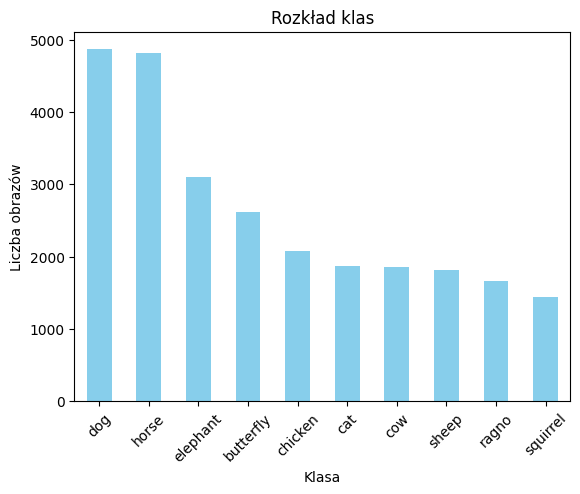

In [9]:
class_counts = pd.Series(train_labels).value_counts()
class_counts.plot(kind='bar', color='skyblue')
plt.xticks(np.arange(len(nazwy_klas)), nazwy_klas, rotation=45)
plt.xlabel('Klasa')
plt.ylabel('Liczba obrazów')
plt.title('Rozkład klas')
plt.show()

Analiza rozkładu wielkości obrazów z uwzględnieniem klas

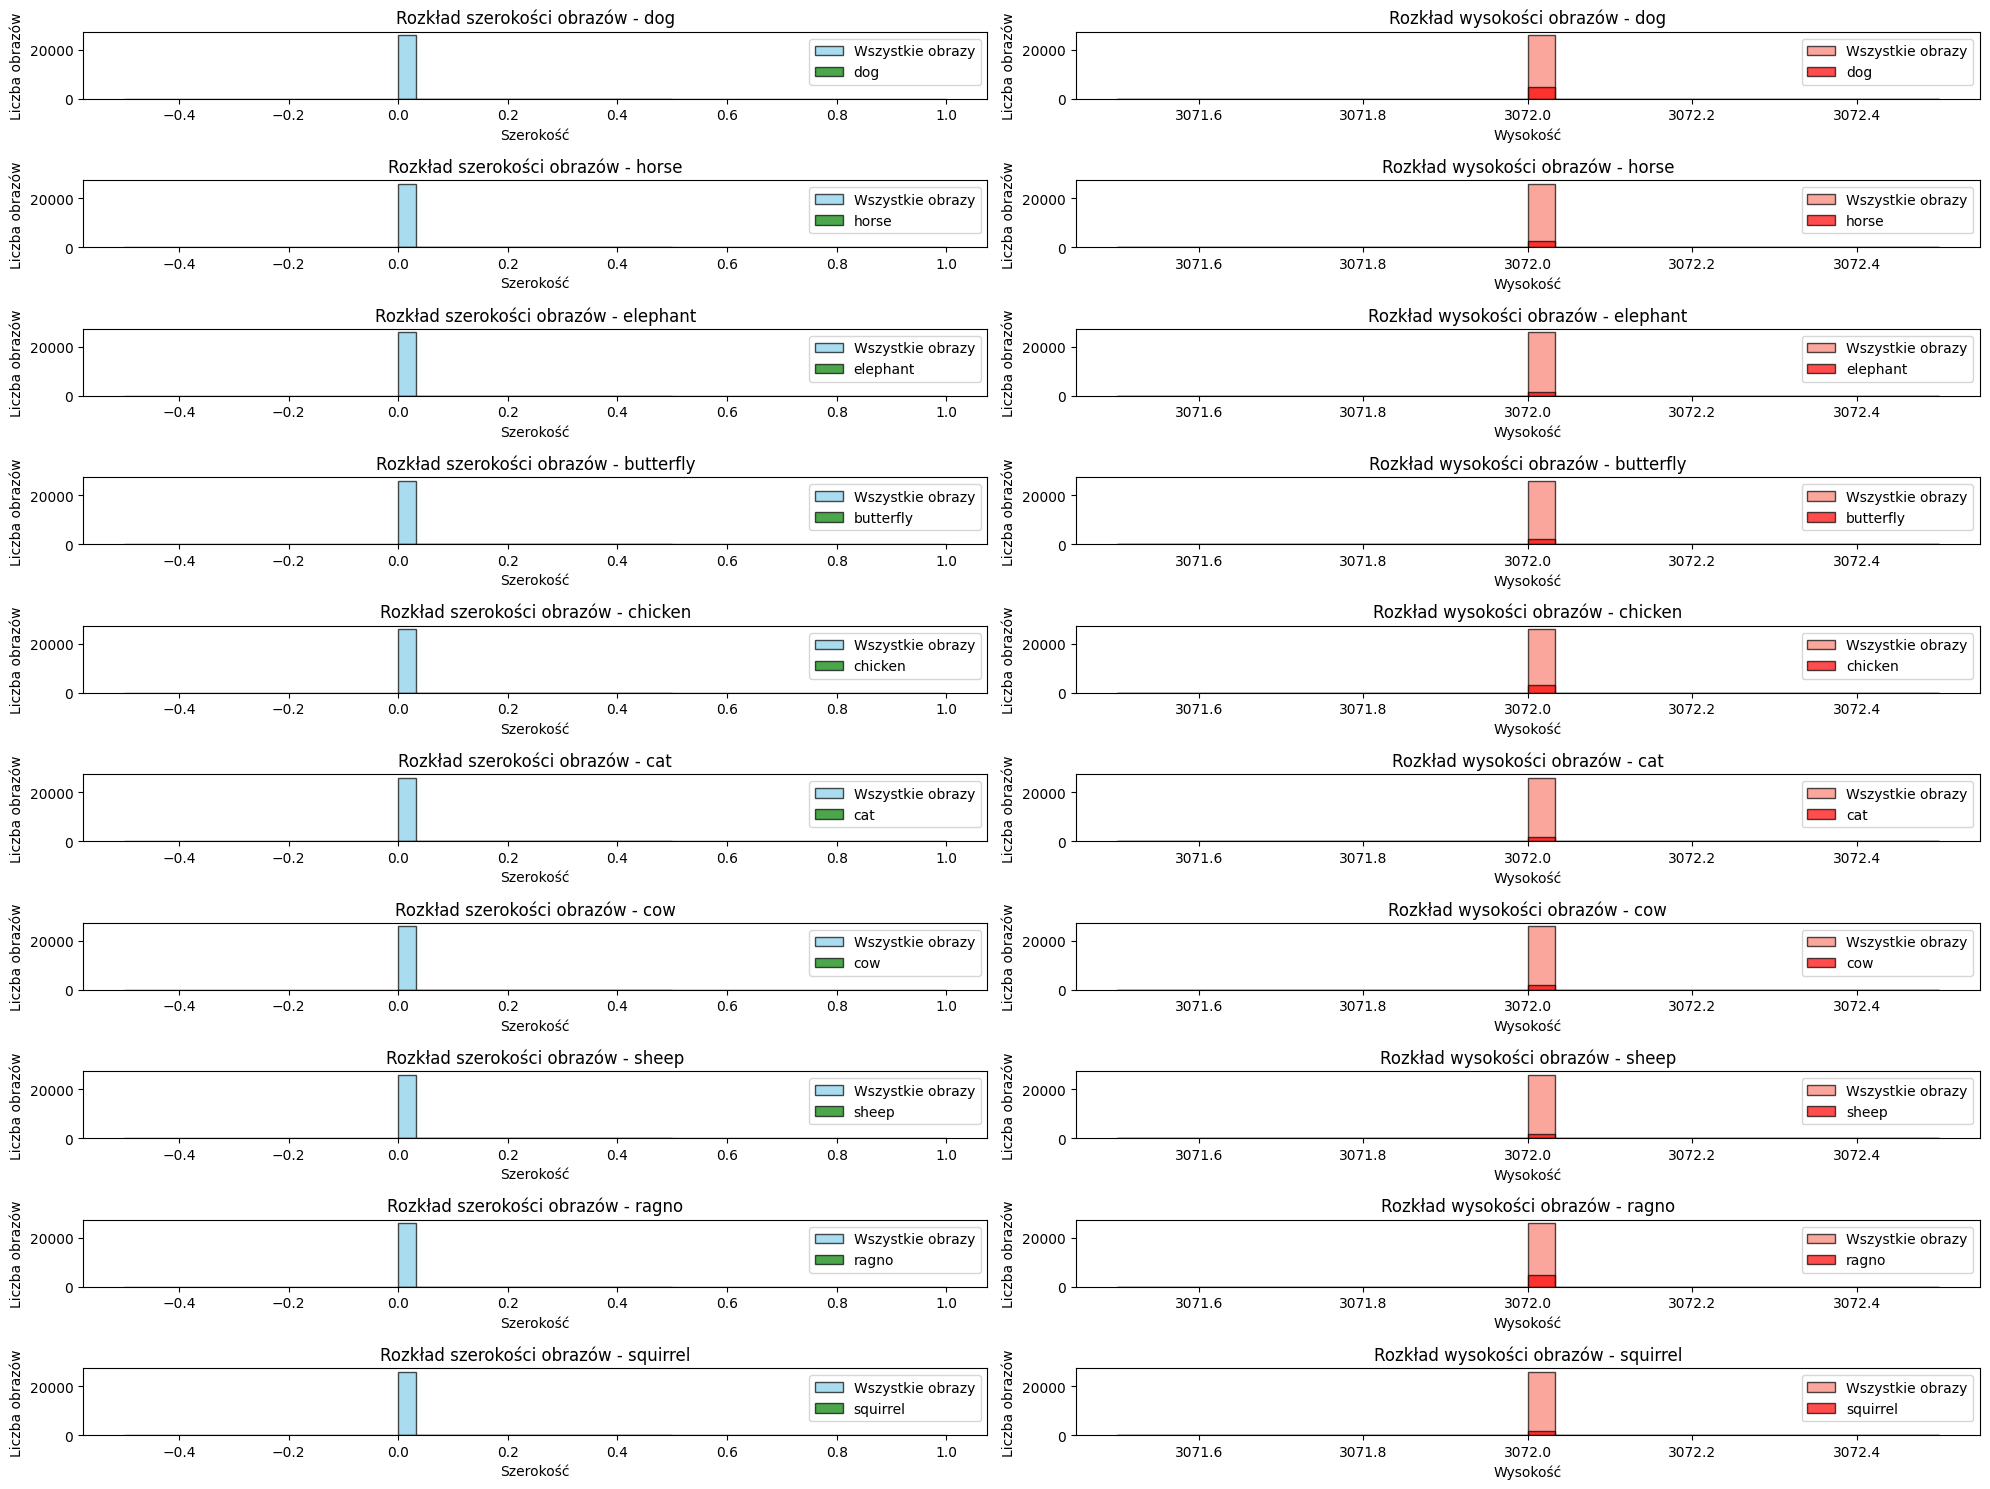

In [10]:
def plot_image_size_distribution_by_class(images, labels, class_names):
    image_sizes = [image.shape for image in images]

    widths = [size[1] if len(size) > 1 else 0 for size in image_sizes]
    heights = [size[0] if len(size) > 0 else 0 for size in image_sizes]

    plt.figure(figsize=(20, 15))

    for class_idx, class_name in enumerate(class_names):
        class_images = images[labels == class_idx]
        
        plt.subplot(len(class_names), 2, class_idx * 2 + 1)
        plt.hist(widths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
        plt.hist([image.shape[1] for image in class_images if len(image.shape) > 1], bins=30, color='green', edgecolor='black', alpha=0.7)
        plt.title(f'Rozkład szerokości obrazów - {class_name}')
        plt.xlabel('Szerokość')
        plt.ylabel('Liczba obrazów')
        plt.legend(['Wszystkie obrazy', f'{class_name}'])

        plt.subplot(len(class_names), 2, class_idx * 2 + 2)
        plt.hist(heights, bins=30, color='salmon', edgecolor='black', alpha=0.7)
        plt.hist([image.shape[0] for image in class_images if len(image.shape) > 0], bins=30, color='red', edgecolor='black', alpha=0.7)
        plt.title(f'Rozkład wysokości obrazów - {class_name}')
        plt.xlabel('Wysokość')
        plt.ylabel('Liczba obrazów')
        plt.legend(['Wszystkie obrazy', f'{class_name}'])

    plt.subplots_adjust(wspace=0.5, hspace=0.5)  
    plt.tight_layout()
    plt.show()
# Wykresy rozkładu szerokości i wysokości obrazów dla każdej klasy
plot_image_size_distribution_by_class(train_photos, train_labels, nazwy_klas)


Analiza rozkładu kanałów kolorów z uwzględnieniem klas

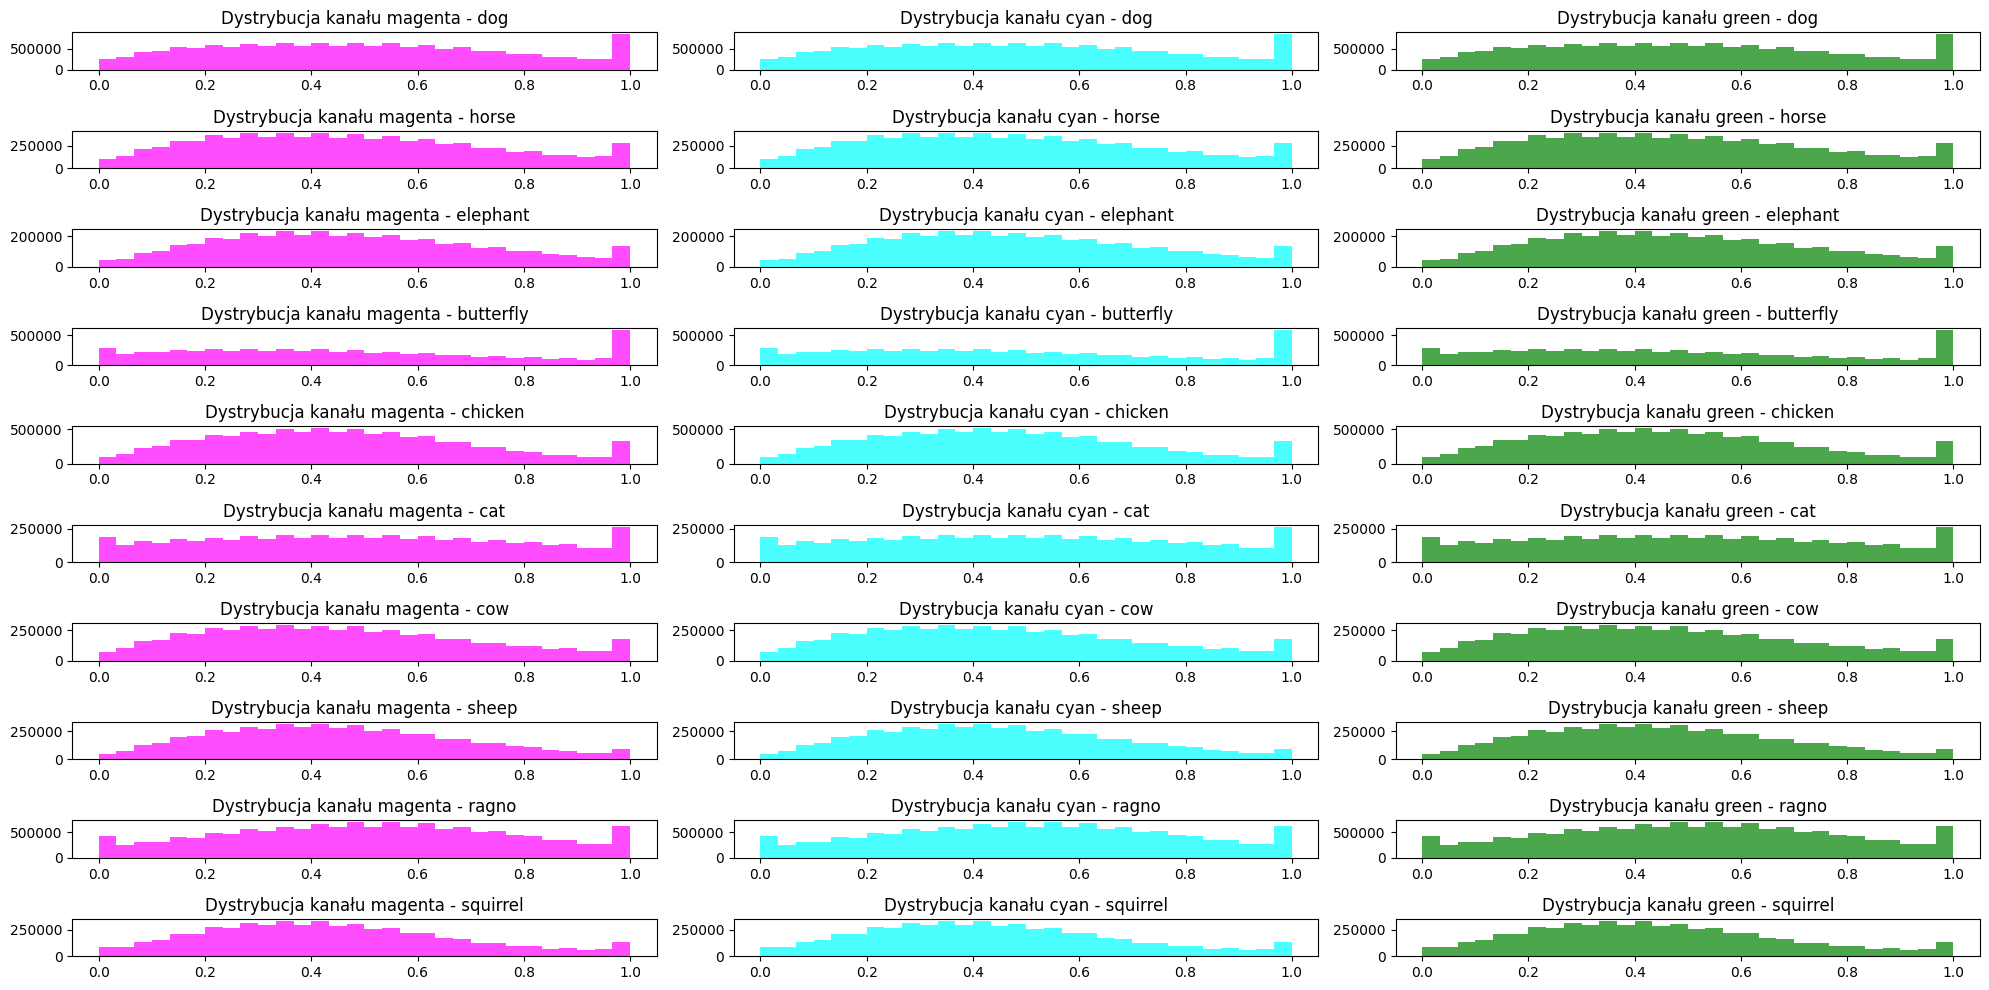

In [11]:
def plot_color_distribution_by_class(images, labels, class_names):
    plt.figure(figsize=(20, 10))

    for class_idx, class_name in enumerate(class_names):
        class_images = images[labels == class_idx]
        for i in range(3):
            plt.subplot(len(class_names), 3, class_idx * 3 + i + 1)
            channel_values = class_images.ravel()
            plt.hist(channel_values, bins=30, color=['magenta', 'cyan', 'green'][i], alpha=0.7)
            plt.title(f'Dystrybucja kanału {["magenta", "cyan", "green"][i]} - {class_name}')

    plt.tight_layout()
    plt.show()
# Wykresy dystrybucji kanałów kolorów dla każdej klasy
plot_color_distribution_by_class(train_photos, train_labels, nazwy_klas)

Przygotowanie modelu

Ten fragment kodu zawiera model Support Vector Machine (SVM). Model jest trenowany na danych treningowych, a wyniki są oceniane na zbiorze treningowym i walidacyjnym. Model jest zapisywany i wczytywany, aby uniknąć konieczności trenowania go ponownie.

In [12]:
import os
import joblib
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from skimage import io, color
from tqdm import tqdm

X_train, X_test, y_train, y_test = train_test_split(train_photos, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

try:
    final_model = joblib.load('best_model3.pk1')
    print("Model already fitted.")
except FileNotFoundError:
    print("Model not found. Fitting the model...")
    final_model = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
    final_model.fit(X_train_scaled, y_train)
    joblib.dump(final_model, 'best_model3.pk1')

train_pred = final_model.predict(X_train_scaled)
val_pred = final_model.predict(X_test_scaled)

classification_report_final = classification_report(y_test, val_pred)

print(f'Final Accuracy for Training: {np.mean(train_pred == y_train)}')
print(f'Final Accuracy for Validation: {np.mean(val_pred == y_test)}')
print('Final Classification Report:\n', classification_report_final)


Model already fitted.
Final Accuracy for Training: 0.4618696775428189
Final Accuracy for Validation: 0.38251052430156907
Final Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.51      0.40       986
           1       0.40      0.38      0.39       516
           2       0.38      0.18      0.24       310
           3       0.50      0.32      0.39       427
           4       0.35      0.33      0.34       613
           5       0.25      0.14      0.18       330
           6       0.31      0.24      0.27       324
           7       0.38      0.28      0.32       383
           8       0.51      0.64      0.57       964
           9       0.20      0.16      0.18       373

    accuracy                           0.38      5226
   macro avg       0.36      0.32      0.33      5226
weighted avg       0.38      0.38      0.37      5226



Walikdacja krzyżowa

Ten fragment kodu przeprowadza walidację krzyżową różnych kombinacji parametrów dla modelu SVM i drukuje średnie dokładności.

In [13]:
from sklearn.model_selection import cross_val_score

unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

if num_classes < 2:
    raise ValueError("Number of unique classes in training labels is less than 2. SVM requires at least two classes.")

C_values = [0.1, 1, 10]
kernel_values = ['linear', 'rbf', 'poly']

for C in C_values:
    for kernel in kernel_values:
        svm_model = SVC(C=C, kernel=kernel)
        scores = cross_val_score(svm_model, X_train_scaled[:1000], y_train[:1000], cv=5)
        mean_accuracy = np.mean(scores)
        
        print(f'C={C}, kernel={kernel}, Mean Cross-Validated Accuracy:{mean_accuracy}')

C=0.1, kernel=linear, Mean Cross-Validated Accuracy:0.20600000000000002
C=0.1, kernel=rbf, Mean Cross-Validated Accuracy:0.19099999999999998
C=0.1, kernel=poly, Mean Cross-Validated Accuracy:0.194
C=1, kernel=linear, Mean Cross-Validated Accuracy:0.20600000000000002
C=1, kernel=rbf, Mean Cross-Validated Accuracy:0.29500000000000004
C=1, kernel=poly, Mean Cross-Validated Accuracy:0.21000000000000002
C=10, kernel=linear, Mean Cross-Validated Accuracy:0.20600000000000002
C=10, kernel=rbf, Mean Cross-Validated Accuracy:0.314
C=10, kernel=poly, Mean Cross-Validated Accuracy:0.219


Ocena modelu z C=1

In [14]:
model = SVC(C=1, kernel='rbf', gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

train_pred = final_model.predict(X_train_scaled)
val_pred = final_model.predict(X_test_scaled)

print(f'Final Accuracy for Training: {np.mean(train_pred == y_train)}')
print(f'Final Accuracy for Validation: {np.mean(val_pred == y_test)}')

Final Accuracy for Training: 0.4618696775428189
Final Accuracy for Validation: 0.38251052430156907


Ocena modelu z C=10

In [16]:
model = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
model.fit(X_train_scaled, y_train)

train_pred = final_model.predict(X_train_scaled)
val_pred = final_model.predict(X_test_scaled)

print(f'Final Accuracy for Training: {np.mean(train_pred == y_train)}')
print(f'Final Accuracy for Validation: {np.mean(val_pred == y_test)}')

Final Accuracy for Training: 0.4618696775428189
Final Accuracy for Validation: 0.38251052430156907


Model KNN

Ten fragment kodu przeprowadza walidację krzyżową dla różnych liczności sąsiadów w modelu k-Nearest Neighbors (kNN).

In [ ]:
neighbors_values = [3, 5, 7, 9, 11, 15, 17, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]

for n_neighbors in neighbors_values:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    scores = cross_val_score(knn_model, X_train_scaled[:1000], y_train[:1000], cv=5)
    
    mean_accuracy = np.mean(scores)
    
    print(f'n_neighbors = {n_neighbors}, Mean Accuracy: {mean_accuracy}')

n_neighbors = 3, Mean Accuracy: 0.21600000000000003
n_neighbors = 5, Mean Accuracy: 0.215
n_neighbors = 7, Mean Accuracy: 0.21600000000000003
n_neighbors = 9, Mean Accuracy: 0.21900000000000003
n_neighbors = 11, Mean Accuracy: 0.225
n_neighbors = 15, Mean Accuracy: 0.21400000000000002
n_neighbors = 17, Mean Accuracy: 0.20800000000000002
n_neighbors = 20, Mean Accuracy: 0.211
n_neighbors = 25, Mean Accuracy: 0.215
n_neighbors = 30, Mean Accuracy: 0.20600000000000002
n_neighbors = 40, Mean Accuracy: 0.20400000000000001
n_neighbors = 50, Mean Accuracy: 0.203
n_neighbors = 60, Mean Accuracy: 0.19999999999999998
n_neighbors = 70, Mean Accuracy: 0.198
n_neighbors = 80, Mean Accuracy: 0.197
n_neighbors = 90, Mean Accuracy: 0.19499999999999998
n_neighbors = 100, Mean Accuracy: 0.196


Porównanie modeli kNN

Model kNN ostatecznie jest trenowany z wykorzystaniem liczby sąsiadów, która uzyskała najlepsze wyniki podczas walidacji krzyżowej, a następnie zapisywany do pliku

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)
joblib.dump(knn_model, 'knn_model.joblib')

train_predictions_knn = knn_model.predict(X_train_scaled)
val_predictions_knn = knn_model.predict(X_test_scaled)

train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)
val_accuracy_knn = accuracy_score(y_test, val_predictions_knn)

print(f'Training Accuracy (KNN): {train_accuracy_knn}')
print(f'Validation Accuracy (KNN): {val_accuracy_knn}')

Training Accuracy (KNN): 0.4827767677734188
Validation Accuracy (KNN): 0.32051282051282054


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=28) 
knn_model.fit(X_train_scaled, y_train)
joblib.dump(knn_model, 'knn_model.joblib')

train_predictions_knn = knn_model.predict(X_train_scaled)
val_predictions_knn = knn_model.predict(X_test_scaled)

train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)
val_accuracy_knn = accuracy_score(y_test, val_predictions_knn)

print(f'Training Accuracy (KNN): {train_accuracy_knn}')
print(f'Validation Accuracy (KNN): {val_accuracy_knn}')

Training Accuracy (KNN): 0.3032245718113099
Validation Accuracy (KNN): 0.2740145426712591
